In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')


In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Histogram

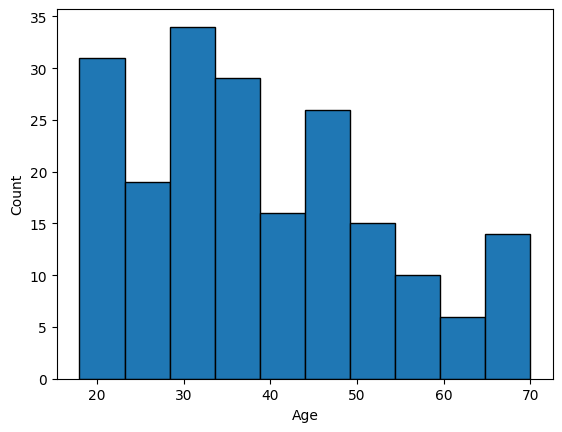

In [16]:
plt.hist(df['Age'],histtype='bar', ec = 'black', bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distplot

<Axes: xlabel='Age', ylabel='Density'>

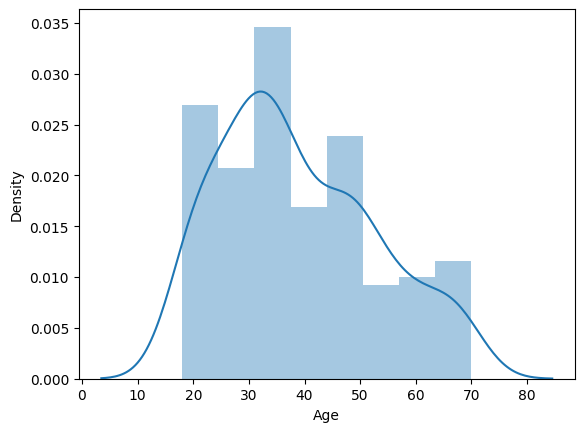

In [21]:
sns.set_style()
sns.distplot(df['Age'])

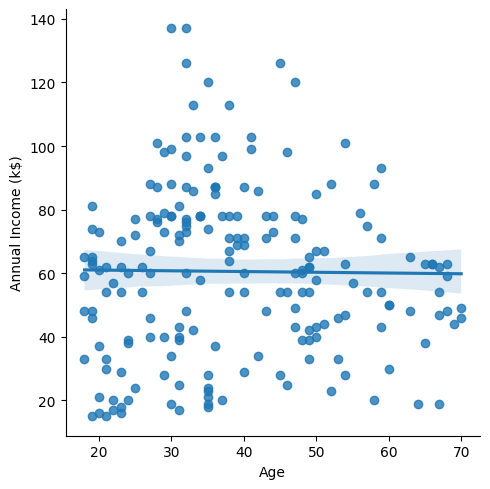

In [22]:
sns.lmplot(x = 'Age', y = 'Annual Income (k$)', data = df)

# LMPlot

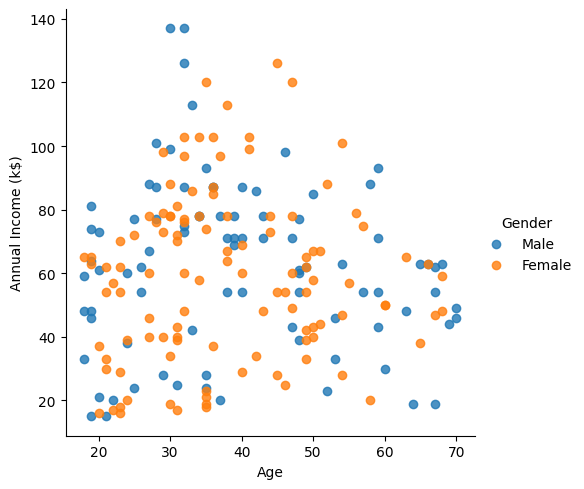

In [23]:
sns.lmplot(x = 'Age', y = 'Annual Income (k$)', data=df, fit_reg=False, hue='Gender')

# Factorplot / Catplot

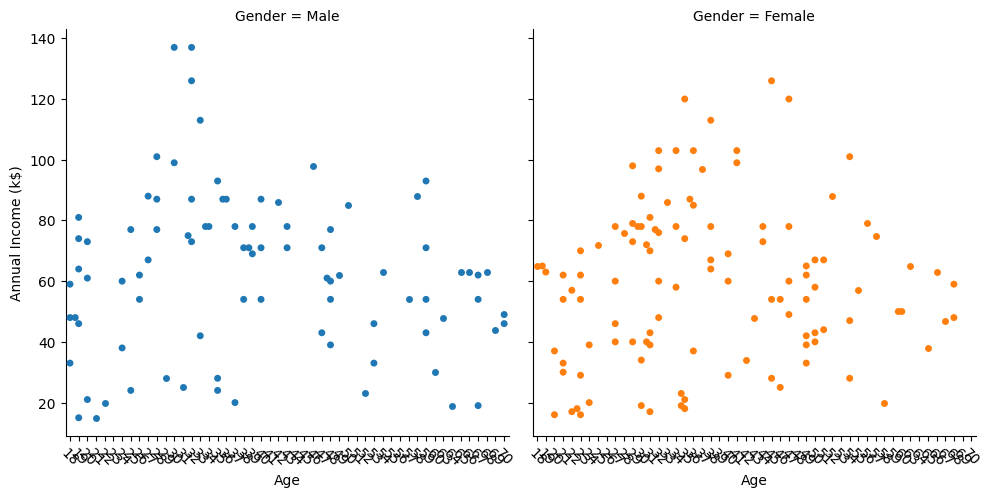

In [31]:
g = sns.catplot(x='Age', y='Annual Income (k$)', data = df, hue = 'Gender', col = 'Gender', kind = 'swarm')
g.set_xticklabels(rotation = -45)

# Boxplot

<Axes: >

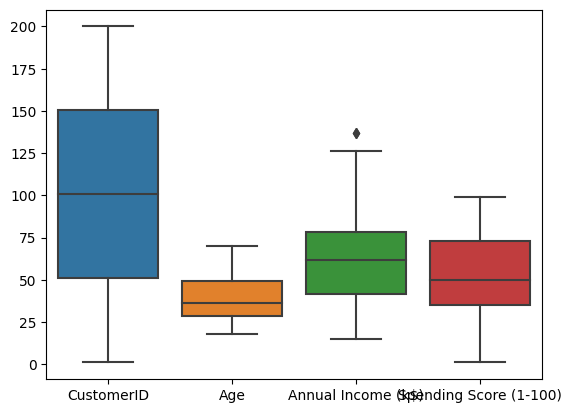

In [33]:
sns.boxplot(data = df)

In [35]:
df2 = df.drop(['CustomerID'], axis='columns')
df2

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


<Axes: >

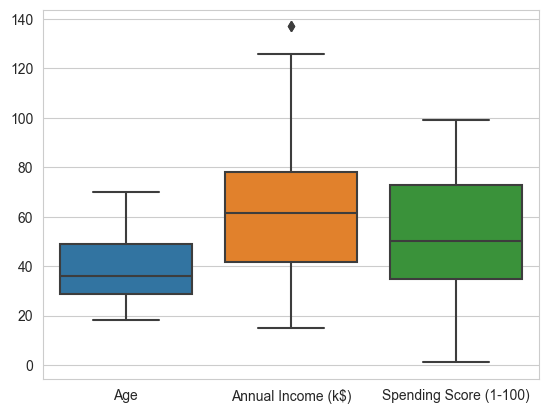

In [39]:
sns.set_style('whitegrid')
sns.boxplot(data = df2)


# Violinplot

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

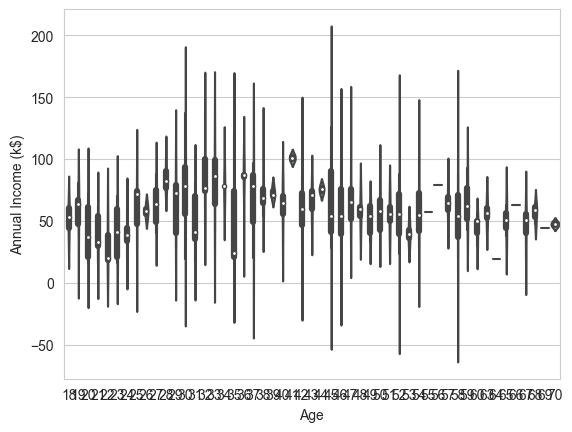

In [43]:
sns.violinplot(x= 'Age', y = 'Annual Income (k$)', data=df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

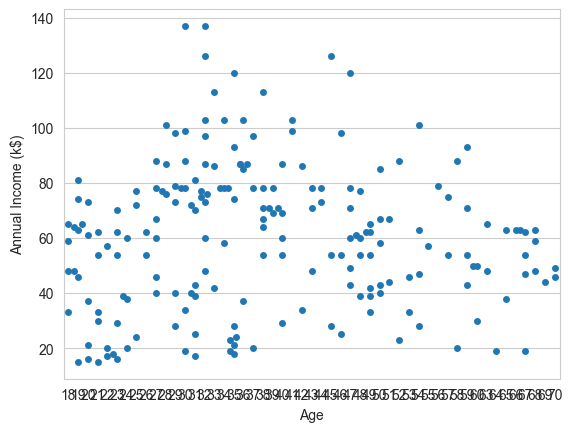

In [41]:
sns.swarmplot(x= 'Age', y = 'Annual Income (k$)', data=df)

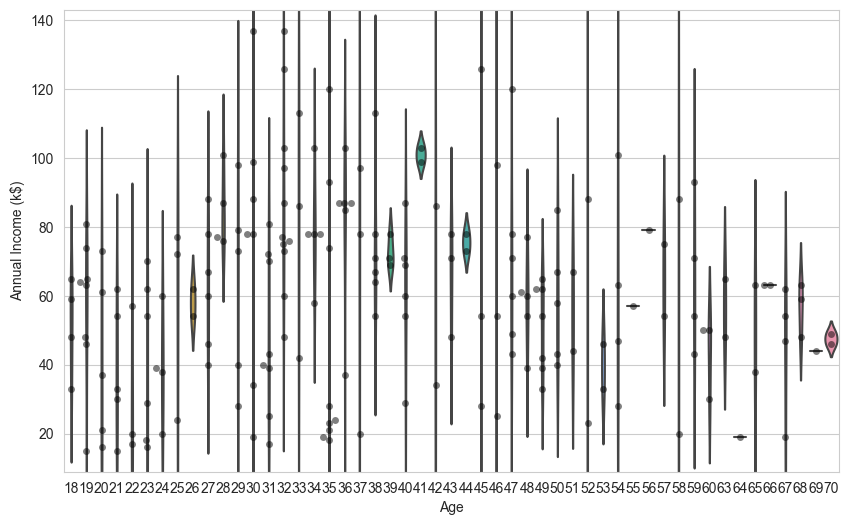

In [47]:
plt.figure(figsize=(10,6))
sns.violinplot(x= 'Age', y = 'Annual Income (k$)', data=df, inner = None)
sns.swarmplot(x= 'Age', y = 'Annual Income (k$)', data=df, color='k', alpha = 0.5)
plt.show()

# Data wrangling with pandas

In [53]:
stats_df = df.drop(['Gender'], axis =1)
melted_df = pd.melt(stats_df, id_vars = ["CustomerID", "Age"], var_name = 'Stats')
melted_df

,CustomerID,Age,Stats,value
0,1,19,Annual Income (k$),15
1,2,21,Annual Income (k$),15
2,3,20,Annual Income (k$),16
3,4,23,Annual Income (k$),16
4,5,31,Annual Income (k$),17
...,...,...,...,...
395,196,35,Spending Score (1-100),79
396,197,45,Spending Score (1-100),28
397,198,32,Spending Score (1-100),74
398,199,32,Spending Score (1-100),18


# Swarmplot

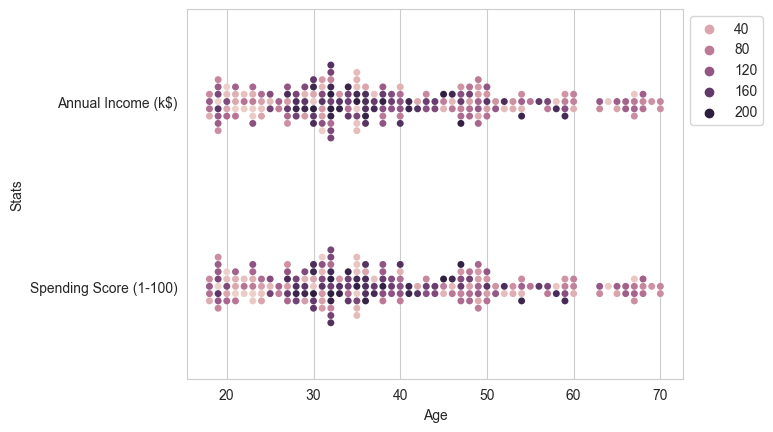

In [64]:
sns.swarmplot(x = 'Age', y = 'Stats', data = melted_df, hue = 'CustomerID')
plt.legend(bbox_to_anchor = (1,1))

# Empirical Cumulative Distribution function ECDF

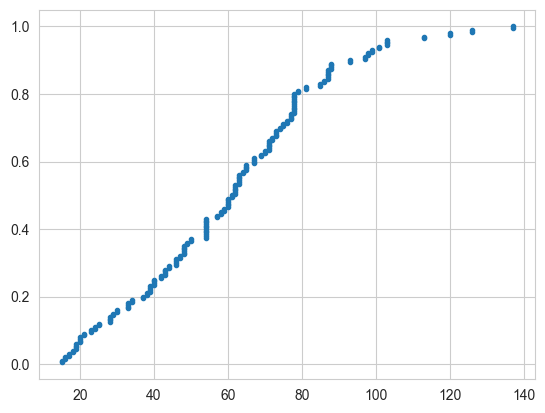

In [68]:
x = np.sort(df['Annual Income (k$)'])
y = np.arange(1, len(x)+1)/len(x)
plt.plot(x,y, marker = ".", linestyle = 'none')
plt.show()

# Heatmap

<Axes: >

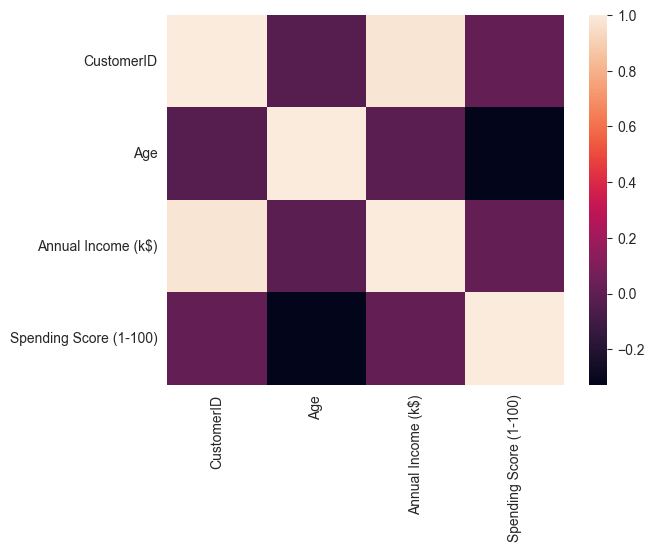

In [69]:
corr = stats_df.corr()
sns.heatmap(corr)

# Barplot

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

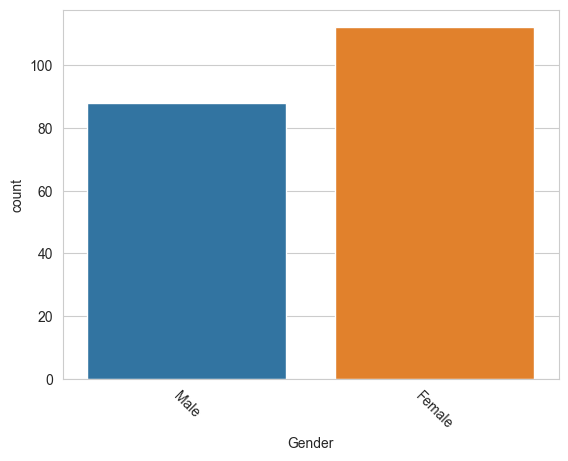

In [71]:
sns.countplot(x = 'Gender', data = df)
plt.xticks(rotation = -45)

# Jointplot

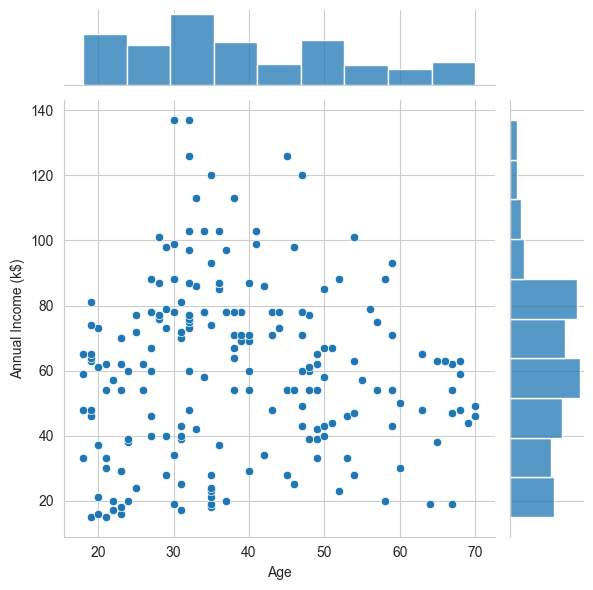

In [72]:
sns.jointplot(x = 'Age', y = 'Annual Income (k$)', data =df)